In [106]:
#https://www.youtube.com/watch?v=j05UUs99eNQ&list=RDCMUCtxCXg-UvSnTKPOzLH4wJaQ&index=4


#https://www.youtube.com/watch?v=2XGSIlgUBDI 
#https://github.com/nachi-hebbar/Time-Series-Forecasting-MachineLearning/blob/main/Time_Series_Forecasting_ML.ipynb

# Supervised Timeseries forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)


#Plotting
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

from statsmodels.tsa.ar_model import AutoReg

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# Dataset

In [5]:
df_lag = pd.read_csv(r'C:\Users\saksh\OneDrive\Desktop\ML\PROJECT\Iteration 2\all_features_lags_v1.csv')

# Method1/
https://www.youtube.com/watch?v=Wsfz3i1AXzY

In [6]:
features = ['lag_1', 'lag_2','lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',  'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14']
label = ['sales']
test_df = df_lag[df_lag['date'] >= '2020-07-01']
train_df = df_lag[df_lag['date'] < '2020-07-01']
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [7]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0,1.0,396.0
1,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0,1.0
2,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0
3,545.0,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0
4,895.0,545.0,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0,173.0,1.0,108.0
8524,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0,173.0,1.0
8525,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0,173.0
8526,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0


In [8]:
y_train

,sales
0,404
1,4
2,545
3,895
4,2184
...,...
8523,166
8524,96
8525,181
8526,220


In [17]:
# cols = [col for col in df_lag.columns if col not in ['date', "product", "pattern", 'sales']]


In [38]:
# X_test = train['sales']
# Y_test= test["sales"]
# Y_train = train["sales"]
# X_train = train[cols]


# RandomForestRegressor

In [9]:
#Parameters with GrissearchCV
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(bootstrap= True, max_depth = 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8,n_estimators= 300, random_state=1)

In [10]:
rf_model.fit(X_train,y_train)

C:\Users\saksh\AppData\Local\Temp/ipykernel_16964/764246711.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300, random_state=1)

In [11]:
pred=rf_model.predict(X_test)


In [12]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['pred'] = pd.Series(pred)

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


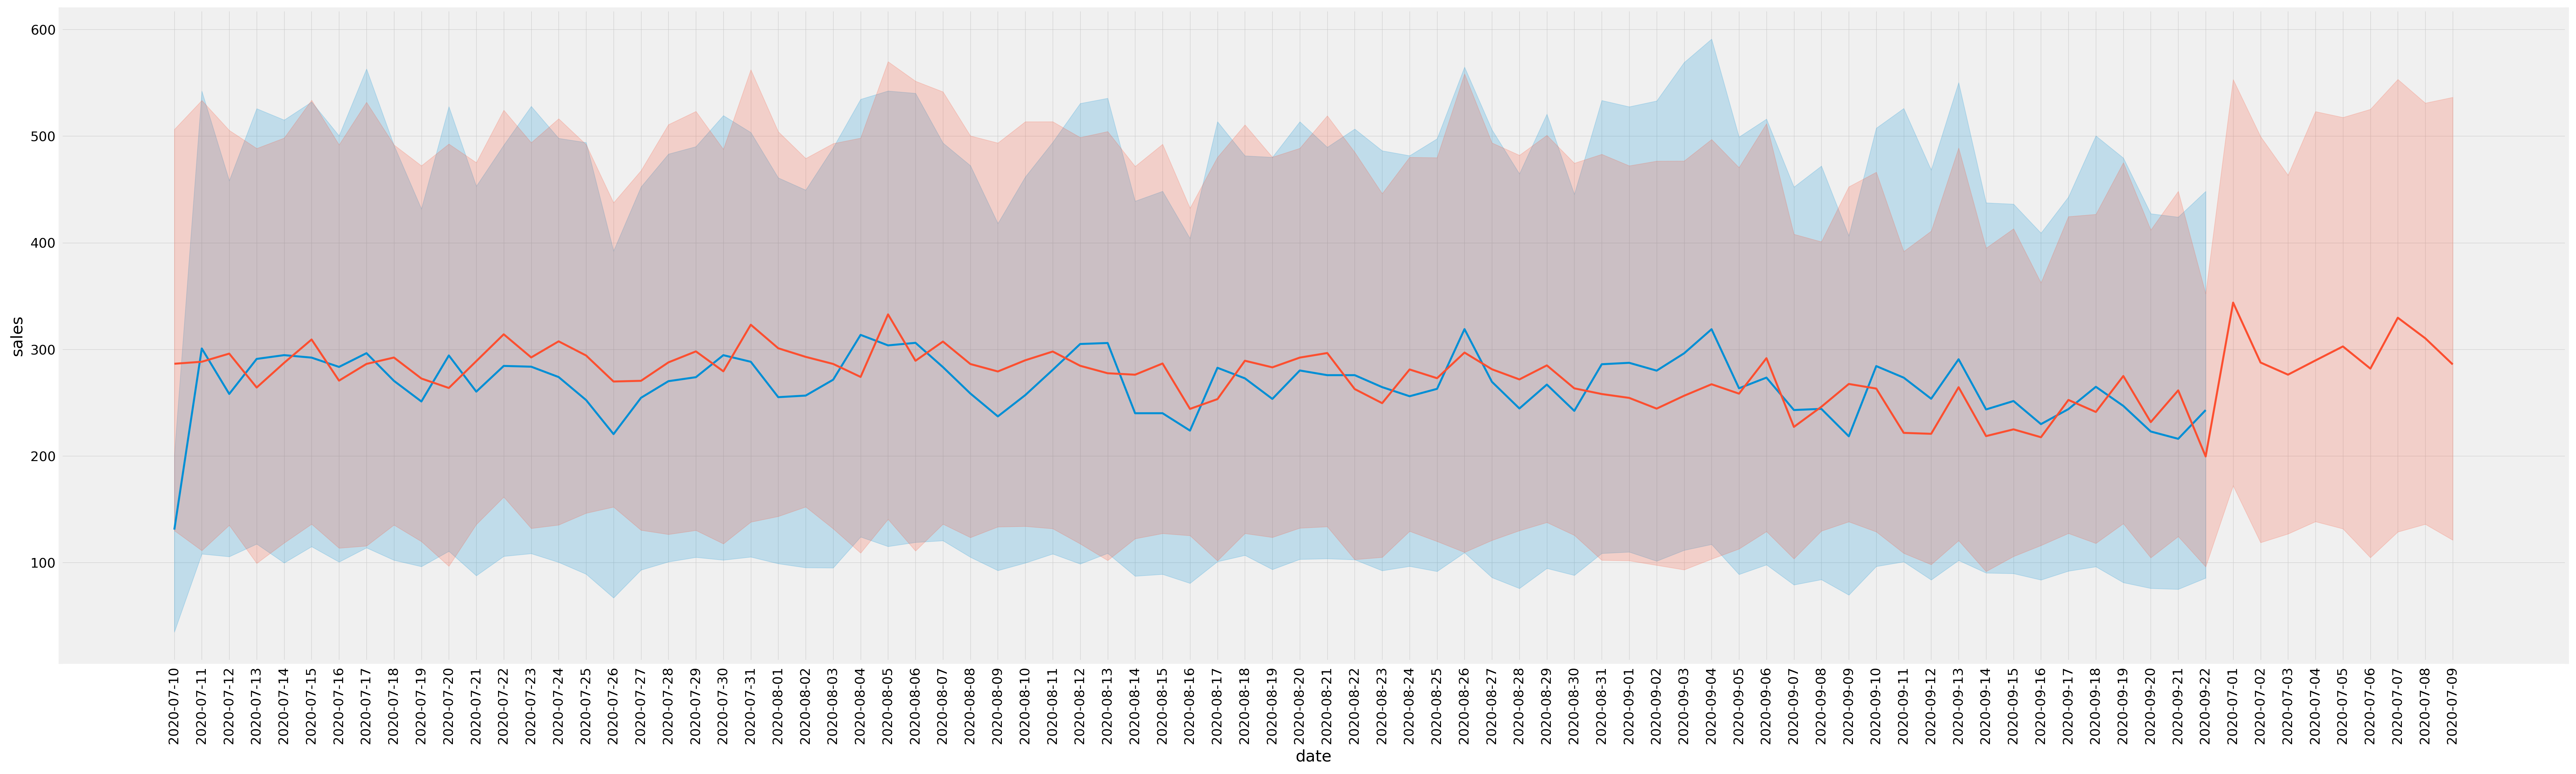

In [14]:
plt.rcParams.update({'figure.figsize': (30, 9), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_lag.tail(1000), x='date', y='sales')
sns.lineplot(data=test_df, x='date', y='pred')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [15]:
test_df.head(30)

,date,product,sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,pred
0,2020-07-01,Accessories,359,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,274.810827
1,2020-07-01,Bags,2,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,60.561001
2,2020-07-01,Cosmetic,2,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,246.671437
3,2020-07-01,Furniture,1,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,554.260870
4,2020-07-01,Garment Full body,733,1.0,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,661.408636
5,2020-07-01,Garment Lower body,934,733.0,1.0,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,1054.559724
6,2020-07-01,Garment Upper body,1485,934.0,733.0,1.0,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,1435.382189
7,2020-07-01,Items,3,1485.0,934.0,733.0,1.0,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,22.202799
8,2020-07-01,Nightwear,61,3.0,1485.0,934.0,733.0,1.0,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,47.677767
9,2020-07-01,Shoes,172,61.0,3.0,1485.0,934.0,733.0,1.0,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,147.721942


In [16]:
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
print('Mean Squared Error for XGBoost is:',rmse_rf)

Mean Squared Error for XGBoost is: 111.86480804672283


In [17]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,pred))

MAE 70.26669330579024


In [18]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,pred))))


RMSE 4.717291071186704


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
print(r2)

0.9126778315859564


In [20]:
n=30712
k=9
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9126522339207969
